In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('new_york_data.csv', index_col = 0)

/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_15692/2076588821.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_data.csv', index_col = 0)


In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
Unnamed: 0            float64
date                   object
avgTemp               float64
_merge                 object
dtype: object

<Axes: xlabel='member_casual'>

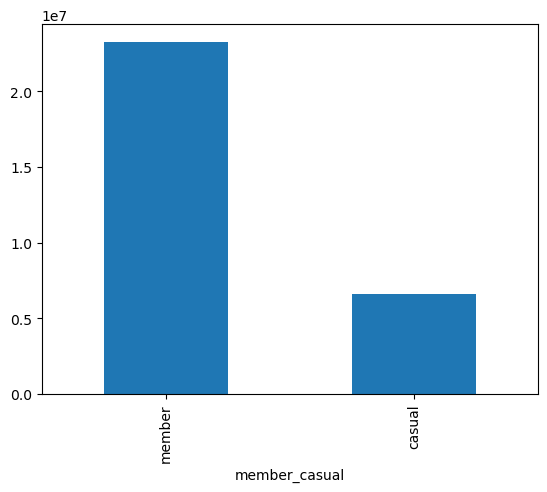

In [4]:
df['member_casual'].value_counts().plot(kind = 'bar')

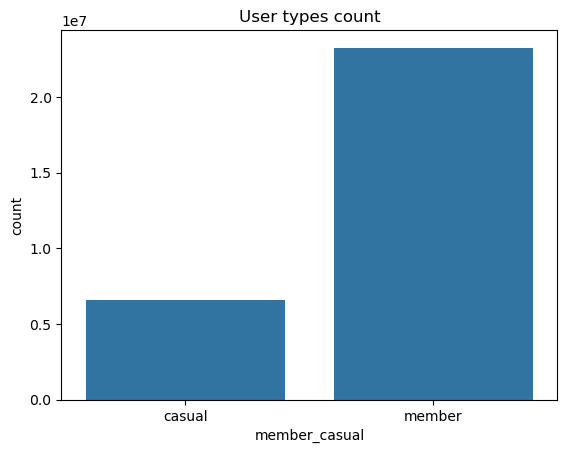

In [5]:
sns.countplot(data = df, x = 'member_casual')
plt.title("User types count")
plt.show()

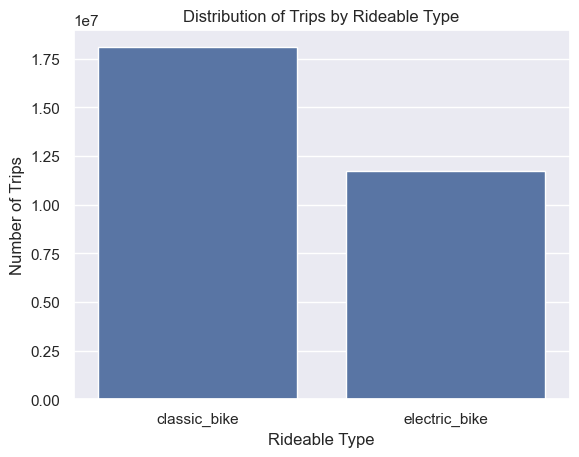

In [6]:
# Set the theme for the plot
sns.set_theme(style="darkgrid")

sns.countplot(data=df, x='rideable_type', order=df['rideable_type'].value_counts().index)
plt.title('Distribution of Trips by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Trips')
plt.show()


In [7]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Unnamed: 0', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [8]:
#Dropping columns
df.drop(columns = {'_merge','Unnamed: 0'}, inplace = True)

In [9]:
#Checking missing values
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       49
start_station_id         49
end_station_name      70092
end_station_id        70092
start_lat                 0
start_lng                 0
end_lat               37392
end_lng               37392
member_casual             0
date                      0
avgTemp                 640
dtype: int64

In [10]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,27.8
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,27.9
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,25.6
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,26.4
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,28.1


In [11]:
df['date'] = pd.to_datetime(df['date'])


In [12]:
#Filtterring data to remove 2021
df_2022 = df[df['date'].dt.year == 2022]


In [13]:
df_2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,27.8
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,27.9
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,25.6
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,26.4
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,28.1


In [14]:
df_2022.isnull().sum()


ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       49
start_station_id         49
end_station_name      69884
end_station_id        69884
start_lat                 0
start_lng                 0
end_lat               37223
end_lng               37223
member_casual             0
date                      0
avgTemp                   0
dtype: int64

In [15]:
df_2022['end_lat'].fillna(df_2022['end_lat'].median(), inplace=True)
df_2022['end_lng'].fillna(df_2022['end_lng'].median(), inplace=True)


/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_15692/783525503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2022['end_lat'].fillna(df_2022['end_lat'].median(), inplace=True)
/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_15692/783525503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['end_lat'].fil

In [16]:
# Dropping rows where 'start_station_name' or 'start_station_id' have missing values
df_2022.dropna(subset=['start_station_name', 'start_station_id'], inplace=True)


/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_15692/2628968364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.dropna(subset=['start_station_name', 'start_station_id'], inplace=True)


In [17]:
# Dropping rows where 'start_station_name' or 'start_station_id' have missing values
df_2022.dropna(subset=['end_station_name', 'end_station_id'], inplace=True)


/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_15692/2743303810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.dropna(subset=['end_station_name', 'end_station_id'], inplace=True)


In [18]:
df_2022.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
date                  0
avgTemp               0
dtype: int64

In [19]:
# Reframe df_2022 into df
df = df_2022.copy()


### 1. Create a bar chart of the top 20 starting stations frequencies

In [20]:
df['value'] = 1

In [21]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [22]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,21478
1,1 Ave & E 16 St,67236
2,1 Ave & E 18 St,70731
3,1 Ave & E 30 St,45341
4,1 Ave & E 39 St,52287
...,...,...
1756,Wyckoff Ave & Gates Ave,16516
1757,Wyckoff St & 3 Ave,250
1758,Wyckoff St & Nevins St,11503
1759,Wythe Ave & Metropolitan Ave,66340


In [23]:
top20 = df_t.nlargest(20, 'value')

In [24]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,128823
1718,West St & Chambers St,123045
495,Broadway & W 58 St,114040
286,6 Ave & W 33 St,106236
8,1 Ave & E 68 St,104685
461,Broadway & E 14 St,98656
485,Broadway & W 25 St,98237
1511,University Pl & E 14 St,96941
463,Broadway & E 21 St,95533
1603,W 31 St & 7 Ave,94035


In [25]:

# Set the style and theme
sns.set_theme(style="darkgrid")
palette = sns.color_palette('PuRd_r', n_colors=20)  # 20 colors for distinct gradient

/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_15692/2087798943.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='value', y='start_station_name', palette=palette)


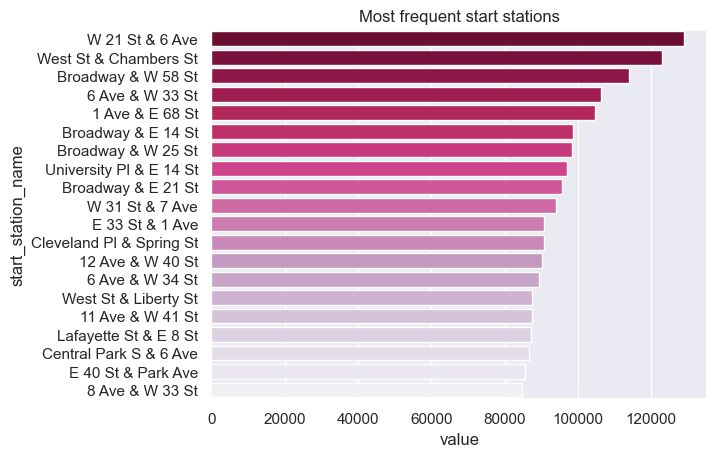

In [26]:

sns.barplot(data=top20, x='value', y='start_station_name', palette=palette)

plt.title("Most frequent start stations")
plt.show()


 #### The palette  (PuRd_r) has enough colors (20), but because it's a gradient palette, some bars might look similar.

In [27]:
df_t2 = df.groupby('end_station_name')['value'].count().reset_index()


In [28]:
end20 =df_t2.nlargest(20, 'value')

In [29]:
end20

,end_station_name,value
1663,W 21 St & 6 Ave,130178
1796,West St & Chambers St,124336
514,Broadway & W 58 St,110313
8,1 Ave & E 68 St,105121
291,6 Ave & W 33 St,104937
1586,University Pl & E 14 St,99178
504,Broadway & W 25 St,98745
480,Broadway & E 14 St,98272
482,Broadway & E 21 St,95512
1679,W 31 St & 7 Ave,94110


/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_15692/3400820952.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=end20, x='value', y='end_station_name', palette=palette)


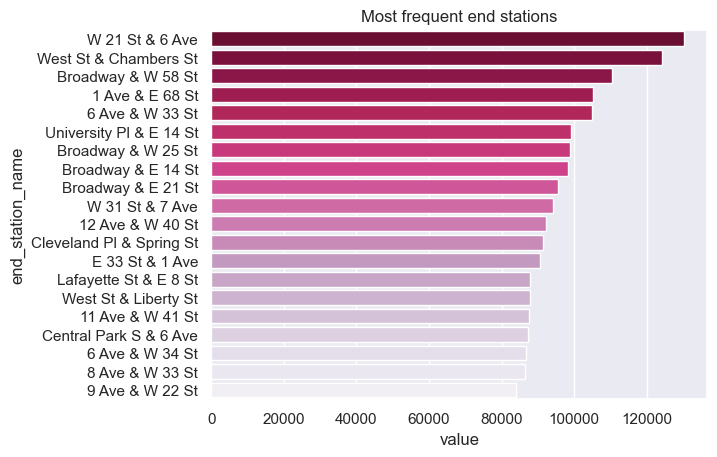

In [30]:

sns.barplot(data=end20, x='value', y='end_station_name', palette=palette)

plt.title("Most frequent end stations")
plt.show()


### 2. Recreate the dual-axis line plot using seaborn.

In [31]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'value'],
      dtype='object')

In [32]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [33]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [34]:
df_group.head()

,date,ride_id
0,2022-01-01,20198
1,2022-01-02,42203
2,2022-01-03,32453
3,2022-01-04,35869
4,2022-01-05,33689


In [35]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

merge_flag
both          29768282
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20198, 18)
Shape of January 2nd is (42203, 18)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'value', 'bike_rides_daily', 'merge_flag'],
      dtype='object')


In [36]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,,
2022-01-01,D09109AEB47FEEA9,classic_bike,2022-01-01 16:31:02.241,2022-02-03 20:27:00.358,Picnic Point,4374.01,E 16 St & 5 Ave,6022.04,40.685126,-74.025353,40.737262,-73.992390,casual,11.6,1,20198,both
2022-01-01,ECDFB9C97FAF0F35,classic_bike,2022-01-01 13:38:37.927,2022-01-01 13:45:58.200,W 13 St & 7 Ave,6030.04,Great Jones St,5636.11,40.737815,-73.999947,40.727434,-73.993790,casual,11.6,1,20198,both
2022-01-01,22F675B5C5A666FD,classic_bike,2022-01-01 00:18:07.680,2022-01-01 01:19:41.047,W 42 St & Dyer Ave,6644.07,West St & Chambers St,5329.03,40.758985,-73.993800,40.717548,-74.013221,casual,11.6,1,20198,both
2022-01-01,39DBCC00E8BCCFCF,classic_bike,2022-01-01 22:40:32.125,2022-01-01 22:46:53.380,8 Ave & W 27 St,6297.07,E 31 St & 3 Ave,6239.08,40.747968,-73.996637,40.743943,-73.979661,member,11.6,1,20198,both
2022-01-01,FB8B1C38D9B41889,electric_bike,2022-01-01 14:46:57.116,2022-01-01 14:53:41.673,University Pl & E 14 St,5905.14,E 31 St & 3 Ave,6239.08,40.734814,-73.992085,40.743943,-73.979661,member,11.6,1,20198,both


In [37]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'value', 'bike_rides_daily', 'merge_flag'],
      dtype='object')

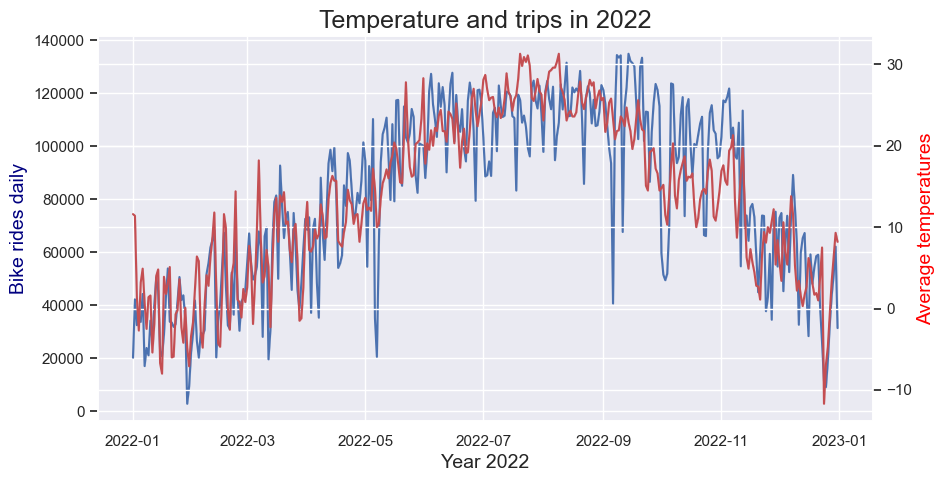

In [38]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### 3. Make a box plot of one of the categorical variables 

In [39]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
value                          int64
bike_rides_daily               int64
merge_flag                  category
dtype: object

In [40]:
df['rideable_type']

0            classic_bike
1            classic_bike
2            classic_bike
3            classic_bike
4           electric_bike
                ...      
29768277     classic_bike
29768278     classic_bike
29768279     classic_bike
29768280     classic_bike
29768281    electric_bike
Name: rideable_type, Length: 29768282, dtype: object

/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_15692/3480287013.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rideable_type', y='avgTemp', data=df, palette=palette)


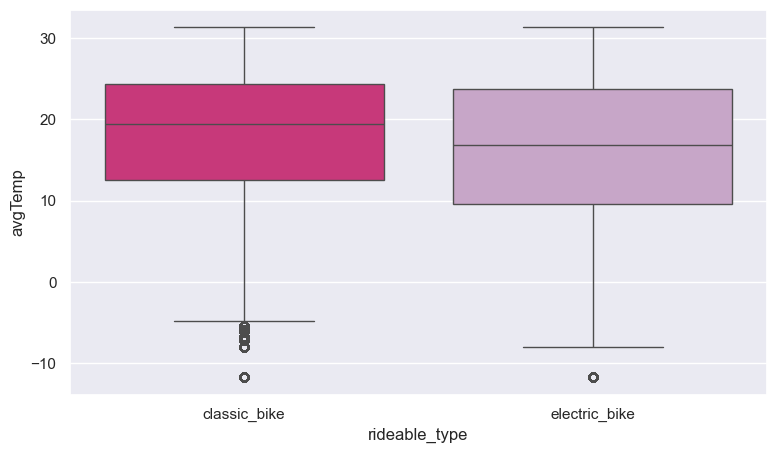

In [60]:
# Set the style
sns.set_style('darkgrid')

# Create a palette with different shades using 'PuRd_r'
palette = sns.color_palette('PuRd_r', n_colors=df['rideable_type'].nunique())

# Create the boxplot with different shades for each category
plt.figure(figsize=(9,5))
sns.boxplot(x='rideable_type', y='avgTemp', data=df, palette=palette)

# Show the plot
plt.show()


#### The box plot shows that both classic and electric bikes are used in similar temperature conditions, with comparable median values and interquartile ranges (IQRs). However, classic bikes have more outliers, indicating colder trips (below -10°C), while electric bikes have a slightly wider temperature range. Overall, classic bikes show more extreme low-temperature usage compared to electric bikes.

In [42]:
sns.set_style('darkgrid')
sns.set_palette('PuRd_r')

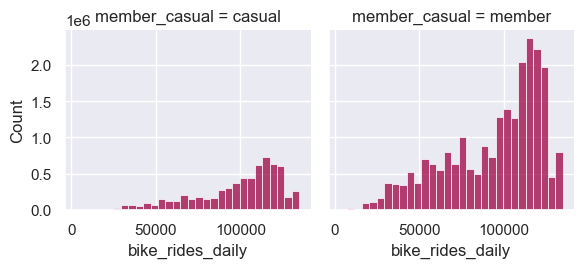

In [43]:
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "bike_rides_daily", bins = 30)
plt.show()

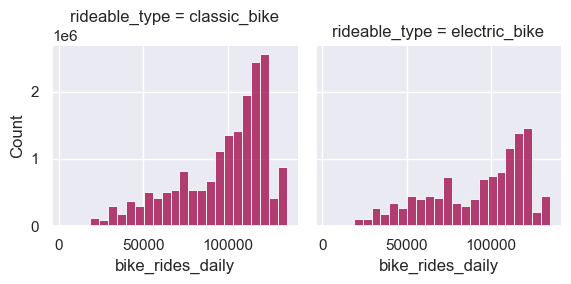

In [44]:
grid = sns.FacetGrid(df, col = "rideable_type")
grid.map(sns.histplot, "bike_rides_daily", bins = 25)
plt.show()

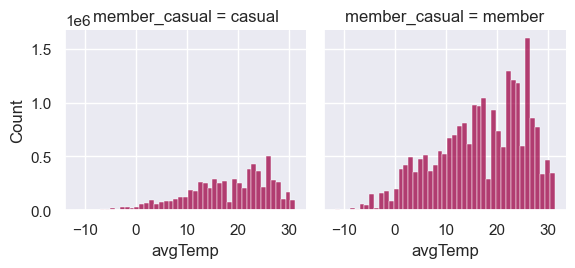

In [45]:
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "avgTemp", bins = 45)
plt.show()

#### Member Riders: The distribution shows that members tend to ride in a wider range of temperatures, with the majority of trips occurring at temperatures between 5°C and 20°C. There is also a tail of rides at both lower and higher temperatures.
#### Casual Riders: Casual riders have a more concentrated distribution, mostly taking trips at moderate temperatures (10°C to 20°C), with fewer rides in colder or hotter conditions compared to members.

#### This suggests that member riders are more likely to ride in extreme temperature conditions, while casual riders prefer more moderate weather for their trips.








In [61]:
df.to_csv('new_york_data_clean.csv')